# 4.4 - Vaex


![vaex](images/vaex.png)

$$$$


[Vaex](https://vaex.io/docs/index.html) es una librería de python library para dataframes (lazy Out-of-Core DataFrames), de manera similar a Pandas. Nos permite visualizar y explorar datos tabulares, calcular medidas de tendencia central como la media, la desviación standard, moda, etc.., a una velocidad de $10^{9}$ filas/registros por segundo. Vaex usa mapeo de memoria, política de ci¡opia cero en memoria,  y la llamada computación lazy para mejor rendimeiento, sin gastar memoria.

**¿Por qué Vaex?**

+ Rendimiento: trabaja con grandes cantidades de datos, pudiendo procesar $10^{9}$ filas/registros por segundo

+ Columnas virtuales/lazy: computa al vuelo, sin gastar memoria

+ Eficiente a nivel de memoria: no realiza copias en memoria cuando filtra/selecciona/samplea.

+ Visualizacion: directamente soportada



https://towardsdatascience.com/how-to-analyse-100s-of-gbs-of-data-on-your-laptop-with-python-f83363dda94

**Data:** https://vaex.io/docs/datasets.html

**si no plotea...:** https://stackoverflow.com/questions/57323126/how-to-do-interactive-2d-scatter-plot-zoom-point-selection-in-vaex

In [3]:
%pip install vaex

In [1]:
import vaex

import numpy as np
import pylab as plt
%matplotlib inline
import seaborn

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time

# tamaño del archivo

!ls -l -h ../data/yellow_taxi_2015_f32s.hdf5

-rw-r--r--@ 1 iudh  staff    12G 20 jun  2021 ../data/yellow_taxi_2015_f32s.hdf5
CPU times: user 2.28 ms, sys: 11.9 ms, total: 14.1 ms
Wall time: 140 ms


In [3]:
%%time

# leer archivo

df=vaex.open('../data/yellow_taxi_2015_f32s.hdf5')

df

CPU times: user 316 ms, sys: 87.2 ms, total: 403 ms
Wall time: 558 ms


#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-12-16 02:26:00.000000000,2014-12-16 02:28:00.000000000,1,CSH,1.09,-73.986725,40.75642,1.0,nan,-73.99646,40.742893,5.0,0.5,0.5,0.0,0.0,6.0
1,VTS,2014-12-15 18:23:00.000000000,2014-12-15 18:58:00.000000000,2,,6.28,-74.00419,40.72119,1.0,nan,-73.97,nan,nan,nan,nan,nan,nan,nan
2,VTS,2015-01-15 19:05:39.000000000,2015-01-15 19:23:42.000000000,1,1,1.59,-73.9939,40.75011,1.0,0.0,-73.974785,40.750618,12.0,1.0,0.5,3.25,0.0,17.05
3,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:53:28.000000000,1,1,3.3,-74.00165,40.724243,1.0,0.0,-73.994415,40.75911,14.5,0.5,0.5,2.0,0.0,17.8
4,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:43:41.000000000,1,2,1.8,-73.96334,40.802788,1.0,0.0,-73.95182,40.824413,9.5,0.5,0.5,0.0,0.0,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"146,112,986",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2,-73.99381,40.72087,1.0,0.0,-73.98621,40.72247,7.5,0.5,0.5,1.76,0.0,10.56
"146,112,987",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527,40.76028,1.0,0.0,-73.939514,40.752388,7.5,0.5,0.5,0.0,0.0,8.8
"146,112,988",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.8,-73.9873,40.73908,1.0,0.0,-73.98867,40.6933,13.5,0.5,0.5,0.0,0.0,14.8
"146,112,989",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.96,-73.99756,40.725693,1.0,0.0,-74.01712,40.705322,8.5,0.5,0.5,0.0,0.0,9.8


CPU times: user 1.2 s, sys: 37.7 ms, total: 1.24 s
Wall time: 288 ms


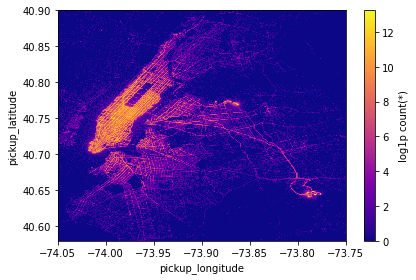

In [9]:
%%time

df.plot(df.pickup_longitude,
       df.pickup_latitude,
       shape=512,
       limits=[[-74.05, -73.75], [40.58, 40.90]],
       f='log1p', 
       colormap='plasma')

CPU times: user 1.15 s, sys: 890 ms, total: 2.04 s
Wall time: 1.8 s


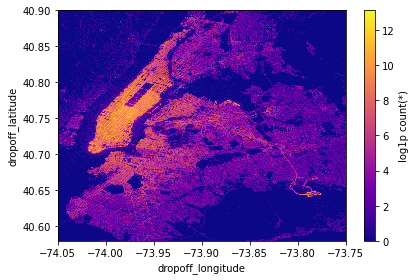

In [11]:
%%time

df.plot(df.dropoff_longitude,
       df.dropoff_latitude,
        shape=512,
       limits=[[-74.05, -73.75], [40.58, 40.90]],
       f='log1p', 
       colormap='plasma')

In [12]:
%%time
df.describe()

CPU times: user 2min 15s, sys: 7.38 s, total: 2min 22s
Wall time: 25.3 s


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
data_type,string,datetime64[ns],datetime64[ns],int64,string,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
count,146112991,146112991,146112991,146112991,146112991,146112991,146112991,146112991,146112991,146112989,146112991,146112990,146112990,146112990,146112990,146112990,146112990,146112990
NA,0,0,0,0,0,0,0,0,0,2,0,1,1,1,1,1,1,1
mean,--,1970-01-01T00:01:25.835533096,1970-01-01T00:00:05.863547737,1.6806633573054433,--,13.137274561803492,-72.80689147618534,40.107714232654736,1.0420616124407445,0.008331969719680431,-72.85359844626949,40.13439191319037,12.938776600018068,0.3142660957767585,0.4975636310707298,1.7284416808430363,0.3077738357453542,16.096247205005444
std,--,9085350718188438.0,9222741930184110.0,1.333365,--,19875.099777,9.220263,5.078433,0.668078,0.090899,9.03923,4.979399,124.599442,0.531459,0.05008,326.836721,1.664408,356.993551
min,--,2014-12-15T18:23:50.043213824,1899-12-31T23:59:43.370698752,0,--,-40840124.0,-874.002625,-78.194679,1.0,0.0,-781.833313,-78.194679,-496.0,-79.0,-3.0,-440.0,-99.0,-496.299988
max,--,2016-01-01T00:00:49.632313344,2253-08-23T08:00:13.061652480,9,--,198623008.0,172.600006,404.866669,99.0,1.0,172.600006,483.450012,825998.625,999.98999,91.0,3950588.75,1901.400024,3950611.5
